<a href="https://colab.research.google.com/github/SamuelOliveira/Colab/blob/main/FT043_2021S1_T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Author: Samuel Oliveira da Silva
RA: 231294
Email: s231294@g.unicamp.br
FT084_2021S1_T4
```

## **Enunciado**

**1.** Dois algoritmos de aprendizado de máquina são avaliados com relação ao tempo de execução necessário para obter um desempenho pré-estabelecido. Como o tempo de execução depende das entradas apresentadas, é necessário testar os algoritmos considerando diferentes realizações. Na Tabela 1, são apresentados os tempos de execução para cada um dos algoritmos (foram executadas 30 realizações). Assumindo que o tempo de execução pode ser modelado por uma distribuição normal, e que os desempenhos dos algoritmos são independentes, compare o desempenho dos dois algoritmos.

https://github.com/chaipi-chaya/Illustration-with-Python/blob/master/Illustration%20with%20Python%20Confidence%20Interval.ipynb

https://www.youtube.com/watch?v=AkmyfLc-EOs

https://www.youtube.com/watch?v=srRr3N56X3c&t=300s

https://cursos.alura.com.br/forum/topico-como-identificar-um-nivel-de-confianca-aceitavel-125039


## **Importando bibliotecas**

In [159]:
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

from scipy.stats import norm, t

def to_numpy(value):
  n_value = value.to_numpy(dtype='float64')[0]
  return n_value

## **Obtendo o Conjunto de Dados**

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/SamuelOliveira/Colab/main/dados_atividade_05.csv')
df_t1 = pd.DataFrame(df, columns=["T1"])
df_t2 = pd.DataFrame(df, columns=["T2"])

# df_t1 = df.loc[df.ID != 0]['T1']
# df_t2 = df.loc[df.ID != 1]['T2']

T1 = df_t1["T1"].values
T2 = df_t2["T2"].values

## **Obtendo Estatisticas Descritivas**

In [161]:
# obtendo estatisticas descritivas

# sigma = desvio padrão
sigma_T1 = to_numpy(round(df_t1.std(axis=0),2))
sigma_T2 = to_numpy(round(df_t2.std(axis=0),2))

# mu = média amostral
mu_T1 = to_numpy(round(df_t1.mean(axis=0),2))
mu_T2 = to_numpy(round(df_t2.mean(axis=0),2))

# intervalo de confiança
ic_T1 = sms.DescrStatsW(T1).tconfint_mean()
ic_T2 = sms.DescrStatsW(T2).tconfint_mean()

ic_T1 = [round(ic_T1[0],2), round(ic_T1[1],2)]
ic_T2 = [round(ic_T2[0],2), round(ic_T2[1],2)]

print('Intervalo de confiança T1: {}\nIntervalo de confiança T2: {}\n'.format(ic_T1, ic_T2))
print('sigma T1: {}\nsigma T2: {}\n'.format(sigma_T1, sigma_T2))
print('media T1: {}\nmedia T2: {}\n'.format(mu_T1, mu_T2))

Intervalo de confiança T1: [3.02, 4.12]
Intervalo de confiança T2: [3.75, 4.67]

sigma T1: 1.47
sigma T2: 1.23

media T1: 3.57
media T2: 4.21



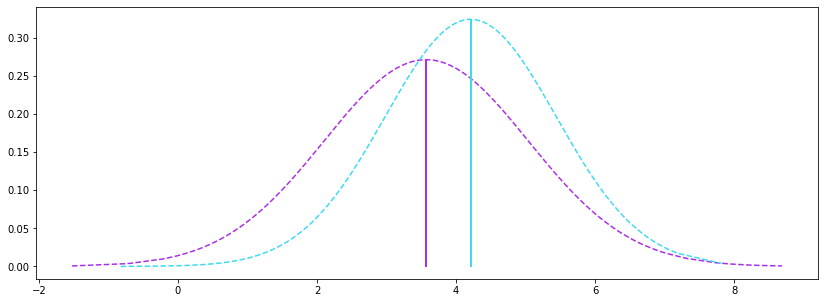

In [171]:
size_T1 = len(T1)
size_T2 = len(T2)

#Degrees of freedom
degrees_freedom = (2*size_T1 - 2)/2

X_C1 = t.rvs(degrees_freedom, mu_T1, sigma_T1, 1000)
X_C2 = t.rvs(degrees_freedom, mu_T1, sigma_T2, 1000)

x1 = np.sort(X_C1)
y1 = t.pdf(x1,degrees_freedom, mu_T1, sigma_T1)

x2 = np.sort(X_C2)
y2 = t.pdf(x2,degrees_freedom, mu_T2, sigma_T2)

# # cnfidence interval left line
# one_x12, one_y12 = [np.std(s, axis=0) * -1.96, np.std(s, axis=0) * -1.96], [0, 20]
# # cnfidence interval right line
# two_x12, two_y12 = [np.std(s, axis=0) * 1.96, np.std(s, axis=0) * 1.96], [0, 20]

plt.figure(figsize=(14,5))
plt.plot(x1, norm.pdf(x1, mu_T1, sigma_T1), '--', color='#aa2ee6');
plt.plot(x2, norm.pdf(x2, mu_T2, sigma_T2), '--', color='#3edbf0');

plt.plot([mu_T1,mu_T1],[0, max(y1)], 'k-', lw=2, color='#aa2ee6')
plt.plot([mu_T2,mu_T2],[0, max(y2)], 'k-', lw=2, color='#3edbf0')

# plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')

# plt.plot(ic_T1[0], ic_T1[0], ic_T1[0], ic_T1[0], marker = 'o')
# plt.plot([mu+(1.96*sigma/np.sqrt(samplesize)),mu+(1.96*sigma/np.sqrt(samplesize))],[0, 3.2], 'k-', lw=2, color='navy')
plt.show()

## **Resoluções**

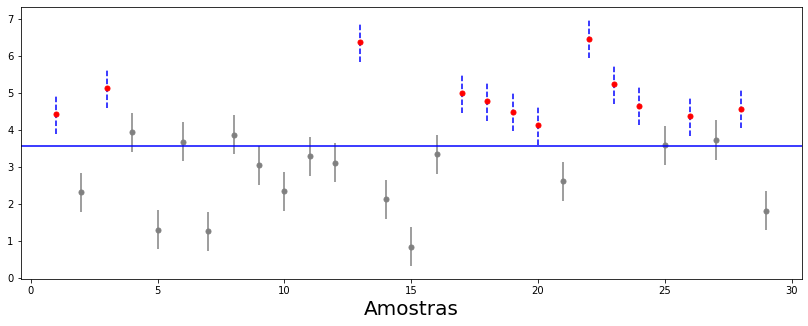

Nível de confiança: 95.0%
Fraçao de intervalos que contém a média: 56.99999999999999%


In [163]:
# numero de intervalos
Ns = size_T1
# media populacional
mu = mu_T1
# desvio padrão populacional
sigma = sigma_T1
beta = 0.95 # nivel de confianca
zalpha = 1.96 # valor de z (a partir de beta)
c = 0 # conta o numero de intervalos que contem a media
plt.figure(figsize=(14,5))

for s in range(1,Ns):
    x = T1[s]                                   # amostra
    IC1 = np.mean(x) - zalpha*sigma/np.sqrt(Ns) #intervalo inferior
    IC2 = np.mean(x) + zalpha*sigma/np.sqrt(Ns) #intervalo superior
    is_between = x <= ic_T1[1] >= ic_T1[0]
    if(is_between):
        c =  c + 1
        # mostra o intervalo em cinza se continar a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color = 'gray')
        plt.plot(s,np.mean(x), 'o', color = 'gray', markersize=5)
    else:
        # mostra o intervalo que nao contem a media
        plt.vlines(s, ymin=IC1, ymax=IC2, color = 'blue', linestyles = 'dashed')
        plt.plot(s,np.mean(x), 'o', color = 'red', markersize=5)

plt.axhline(y = mu, color = 'blue') # mostra a media populacional
plt.xlabel('Amostras', fontsize=20)
plt.show()
print('Nível de confiança: {}%'.format(beta*100))
print('Fraçao de intervalos que contém a média: {}%'.format(round(c/Ns,2)*100))